In [ ]:
# Parameters
num_periods = 10
x = 1

In [20]:
from input_properties import Mine_properties, concentration_func
from mining_data import mining_data
from Mine import Mine
from Time import Time
from Scheduler import Scheduler
import pandas as pd
import json
import matplotlib.pyplot as plt

In [ ]:
# Initialize mining data
# num_periods = 20
state = mining_data((x, 2, 1))
arr, block_properties, HnD = state.build(concentration_func=concentration_func)

In [22]:
# # Create mine instance
# import random
# random.seed(42)
# print(arr.flatten())
# mine_tonnage_list = []
# for i in range(1,arr.flatten().shape[0]+1):
#     random_value = random.randint(50, 90)
#     mine_tonnage_list.append(random_value)

# Mine_properties['block_tonnage'] = mine_tonnage_list
mining_instance = Mine(
    arr,
    block_properties,
    HnD,
    num_periods,
    Mine_properties
)

In [23]:
time_func = Time()
choice = 'greedy'  # or 'minimum'
scheduler = Scheduler(mining_instance, time_func)

In [24]:
# action_list = scheduler.possible_actions()
# period = scheduler.time_func.period()
# scheduler.update_action(action_list,action='initialize')

In [25]:
# response['message']['content']

In [26]:
scheduler.time_func.period()

1

In [27]:
scheduler.mine.ore_tonnage

[0,
 30,
 30,
 28,
 33,
 33,
 31,
 36,
 35,
 34,
 37,
 37,
 35,
 26,
 27,
 25,
 34,
 35,
 33,
 40,
 41,
 38,
 42,
 44,
 40,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 50,
 50,
 0,
 0,
 0]

In [28]:
scheduler.mine.block_tonnage

[0,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50]

In [29]:
for key, row in scheduler.actions_taken.items():
    print(f"{key}: {row['actions_taken']}")

In [30]:
scheduler.schedule(choice=choice)

Scheduling ends


In [31]:
# with open(f"/home/mustavi/mining/results/{len(arr.flatten())}_schedular_{formatted_now}_blockscheduler_conversation_log.txt", "w") as f:
#     for msg in conversation:
#         f.write(f"{msg['role'].upper()}:\n{msg['content']}\n\n")

Period: 1 Scheduler NPV: 2090.8999999999996
Period: 2 Scheduler NPV: 3991.7299999999996
Period: 3 Scheduler NPV: 6471.069999999999
Period: 4 Scheduler NPV: 8725.019999999999
Period: 5 Scheduler NPV: 10774.069999999998
Period: 6 Scheduler NPV: 12636.839999999998
Period: 7 Scheduler NPV: 14330.259999999997
Period: 8 Scheduler NPV: 15869.739999999998
Period: 9 Scheduler NPV: 17269.260000000002
Period: 10 Scheduler NPV: 18541.55
Period: 11 Scheduler NPV: 19698.18
Period: 12 Scheduler NPV: 20749.66
Period: 13 Scheduler NPV: 21705.549999999996
Period: 14 Scheduler NPV: 22574.539999999994
Period: 15 Scheduler NPV: 23364.52999999999
Period: 16 Scheduler NPV: 24082.69999999999
Period: 17 Scheduler NPV: 24735.589999999993
Period: 18 Scheduler NPV: 25329.10999999999
Period: 19 Scheduler NPV: 25868.689999999988
Period: 20 Scheduler NPV: 26359.20999999999


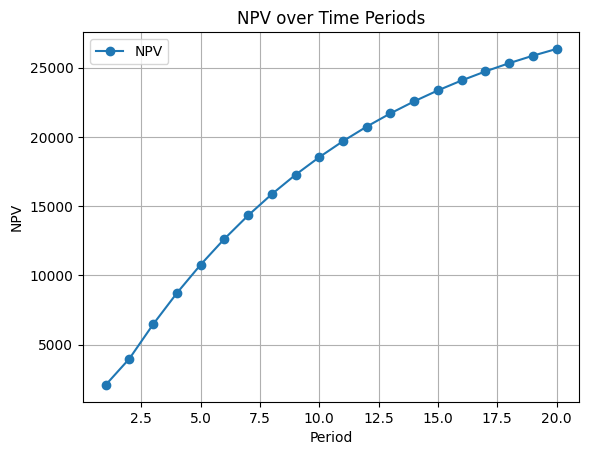

In [ ]:
now = pd.Timestamp.now()
formatted_now = now.strftime("%Y%m%d_%H%M%S")
data= []
for key, val in scheduler.actions_taken.items():
    time_period = key
    print(f"Period: {time_period}",end=' ')
    npv = val['npv'][-1]
    print(f"Scheduler NPV: {npv}")
    data.append((time_period, npv))
npv_df = pd.DataFrame(data, columns=['Period', 'NPV'])
csv_file = f'/home/mustavi/mining/00blocks_ipynb/results/{len(arr.flatten())}_{choice}_block_npv_over_time_{choice}_solution_for_period_{num_periods}_{formatted_now}.csv'
npv_df.to_csv(csv_file, index=False)
npv_df.plot(x='Period', y='NPV', marker='o', title='NPV over Time Periods')
plt.xlabel('Period')
plt.ylabel('NPV')
plt.grid()
# plt.savefig(f'npv_over_time_{choice}_solution_for_period_{num_periods}_{formatted_now}.png')
plt.show()

In [33]:
scheduler.mine.npv

26359.20999999999

In [34]:
scheduler.mine.ore_tonnage

[0,
 30,
 30,
 28,
 33,
 33,
 31,
 36,
 35,
 34,
 37,
 37,
 35,
 26,
 27,
 25,
 34,
 35,
 33,
 40,
 41,
 38,
 42,
 44,
 40,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 50,
 50,
 0,
 0,
 0]

In [35]:
for key, row in scheduler.actions_taken.items():
    print(f"{key}: {row['actions_taken']}")

1: [(1, 1, 50), (2, 1, 30), (1, 2, 20)]
2: [(1, 2, 30), (2, 2, 30), (1, 3, 40)]
3: [(1, 3, 10), (2, 3, 28), (1, 4, 50), (2, 4, 12), (1, 5, 10)]
4: [(2, 4, 21), (1, 5, 40), (2, 5, 19), (1, 6, 30)]
5: [(2, 5, 14), (1, 6, 20), (2, 6, 26), (1, 7, 50)]
6: [(2, 6, 5), (2, 7, 35), (1, 8, 50), (1, 9, 20)]
7: [(2, 7, 1), (2, 8, 35), (1, 9, 30), (2, 9, 4), (1, 10, 40)]
8: [(2, 9, 30), (1, 10, 10), (2, 10, 10), (1, 11, 50), (1, 12, 10)]
9: [(2, 10, 27), (2, 11, 13), (1, 12, 40), (1, 13, 30)]
10: [(2, 11, 24), (2, 12, 16), (1, 13, 20), (1, 14, 50)]
11: [(2, 12, 19), (2, 13, 21), (1, 15, 50), (1, 16, 20)]
12: [(2, 13, 5), (2, 14, 27), (2, 15, 8), (1, 16, 30), (1, 17, 40)]
13: [(2, 15, 17), (2, 16, 23), (1, 17, 10), (1, 18, 50), (1, 19, 10)]
14: [(2, 16, 11), (2, 17, 29), (1, 19, 40), (1, 20, 30)]
15: [(2, 17, 6), (2, 18, 33), (2, 19, 1), (1, 20, 20), (1, 21, 50)]
16: [(2, 19, 39), (2, 20, 1), (1, 22, 50), (1, 23, 20)]
17: [(2, 20, 40), (1, 23, 30), (1, 24, 40)]
18: [(2, 21, 38), (2, 22, 2), (1, 24,

In [36]:
rows = []
for key, triples in scheduler.actions_taken.items():
    for a, b, c in triples['actions_taken']:
        rows.append([key, a, b, c])

df = pd.DataFrame(rows, columns=["Time Period", "Action", "Block", "Amount"])
df.to_csv(f"{csv_file.split('.')[0]}_actions.csv", index=False)

In [37]:
# scheduler.possible_actions()